## Data Analysis and Predictive modeling on Ames Housing data  

### Exhaustive data analysis and preprocessing . Hyper parameter tuning of predictive models

### Introduction

The data set was obtained from Kaggle. 
This data set was used in the Kaggle competition [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  

This data set has  79 explanatory variables , which describing (almost) various aspects of residential homes in Ames, Iowa.  
The challenge is  to predict  the final price of each home.  

#### Acknowledgement

For this work, I have learned a lot from the works of  
* [Exploratory Data Analysis of Housing in Ames, Iowa](https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa)  by [Lee Clemmer](https://www.kaggle.com/leeclemmer)
*  [Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) by [Serigne](https://www.kaggle.com/serigne)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.shape)

(1460, 81)


In [4]:
print(df_test.shape)

(1459, 80)


In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Initial Explorations

In [8]:
# Exploring the target variable

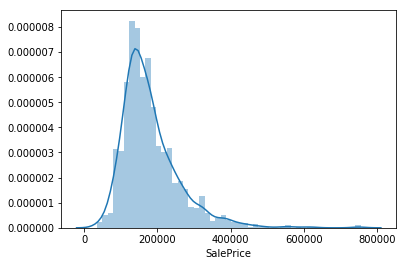

In [9]:
sns.distplot(df_train['SalePrice'])

In [10]:
print('Minimum Sale Price is ${:,.0f} and Maximum Sale Price is ${:,.0f}'.format(df_train.SalePrice.min(),df_train.SalePrice.max()))

Minimum Sale Price is $34,900 and Maximum Sale Price is $755,000


In [11]:
print('Skew of SalePrice is {} and Kurtosis of SalePrice is {}'.format(df_train.SalePrice.skew(),df_train.SalePrice.kurtosis()))

Skew of SalePrice is 1.8828757597682129 and Kurtosis of SalePrice is 6.536281860064529


In [12]:
# As from the above results we see that this variable is positively skewed

In [13]:
# Which neighbourhoods are most common

In [14]:
df_train.groupby(['Neighborhood']).Id.count().sort_values(ascending=False)

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Id, dtype: int64

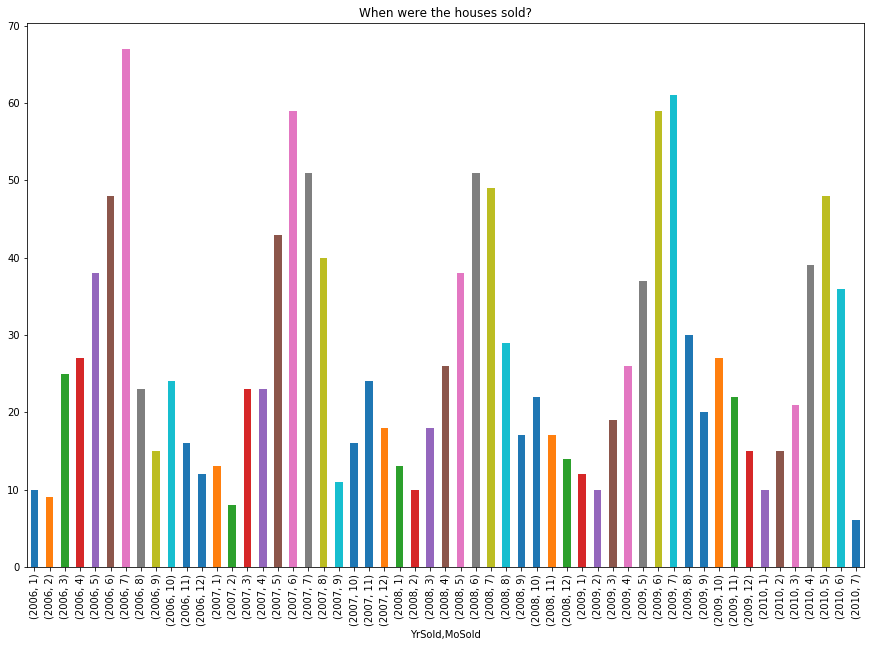

In [15]:
df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(15,10))
plt.title('When were the houses sold?')
plt.show()

In [16]:
#Strong seasonality can be seen

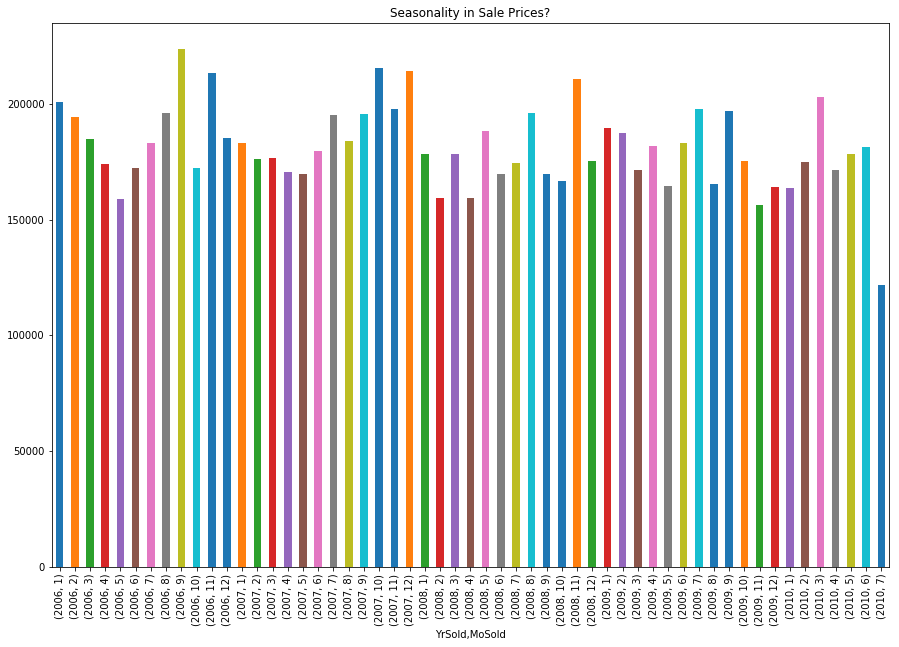

In [17]:
df_train.groupby(['YrSold','MoSold']).SalePrice.mean().plot(kind='bar', figsize=(15,10))
plt.title('Seasonality in Sale Prices?')
plt.show()

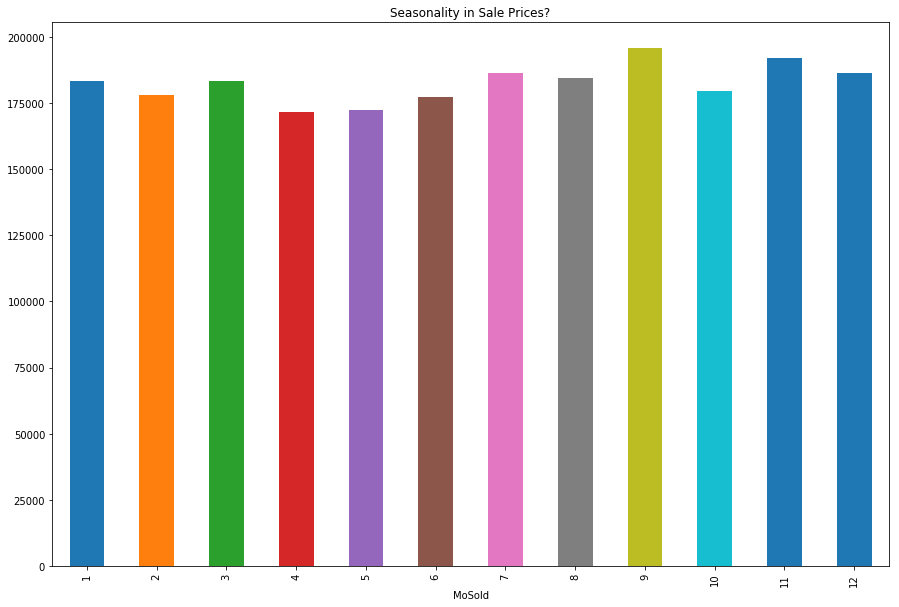

In [18]:
df_train.groupby(['MoSold']).SalePrice.mean().plot(kind='bar', figsize=(15,10))
plt.title('Seasonality in Sale Prices?')
plt.show()

In [19]:
# No Seasonality in Sale Prices , although there is a seasonality in no. of houses sold 

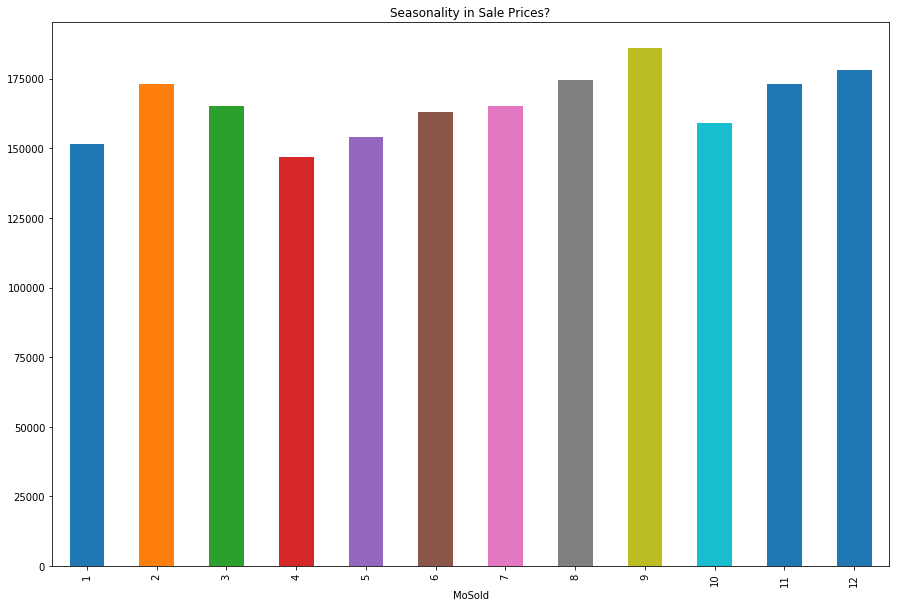

In [20]:
df_train.groupby(['MoSold']).SalePrice.median().plot(kind='bar', figsize=(15,10))
plt.title('Seasonality in Sale Prices?')
plt.show()

In [21]:
# Some pattern can be seen here

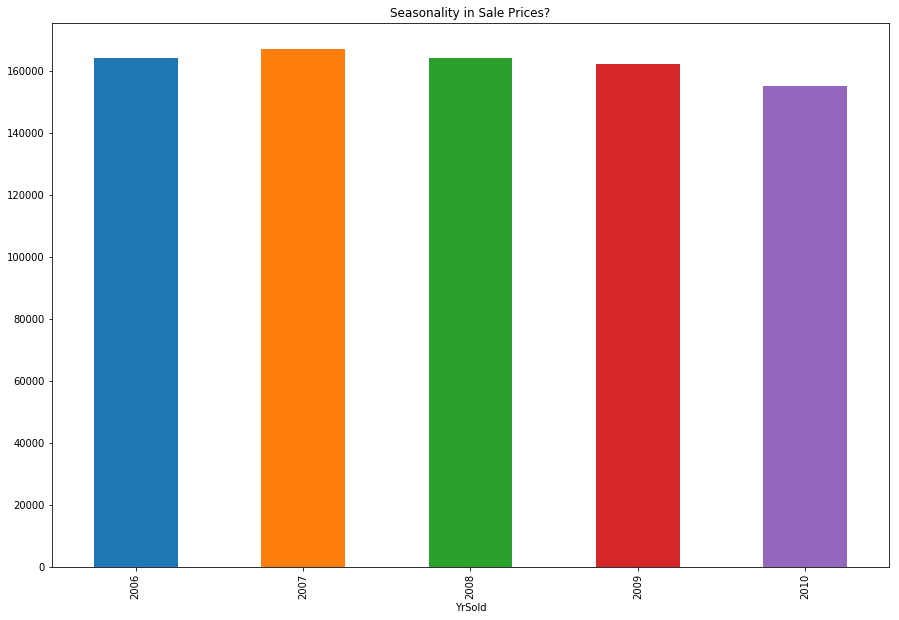

In [22]:
df_train.groupby(['YrSold']).SalePrice.median().plot(kind='bar', figsize=(15,10))
plt.title('Seasonality in Sale Prices?')
plt.show()

In [23]:
df_train[df_train.YearBuilt < 1950].SalePrice.median()

122000.0

In [24]:
df_train[df_train.YearBuilt > 1950].SalePrice.median()

177000.0

In [25]:
df_train.SalePrice.median()

163000.0

In [26]:
df_train[df_train.YearRemodAdd < 1950].SalePrice.median()

nan

In [27]:
df_train[df_train.YearRemodAdd > 1950].SalePrice.median()

172500.0

In [28]:
df_train[df_train.GarageYrBlt < 1950].SalePrice.median()

130200.0

In [29]:
df_train[df_train.GarageYrBlt > 1950].SalePrice.median()

175000.0

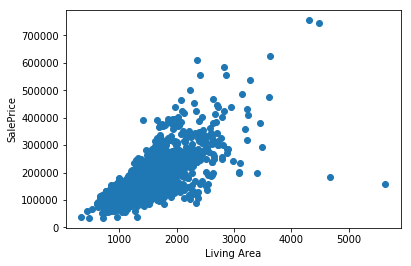

In [30]:
plt.scatter(df_train.GrLivArea,df_train.SalePrice)
plt.xlabel("Living Area")
plt.ylabel("SalePrice")
plt.show()

In [31]:
df_train.drop(df_train[(df_train.GrLivArea>4000)& (df_train.SalePrice<250000)].index,inplace=True)

In [32]:
# High Correlation of GrLivingArea with SalePrice

In [33]:
# Exploring the data types

In [34]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [35]:
ntrain=df_train.shape[0]

In [36]:
ntest=df_test.shape[0]

In [37]:
test_id=df_test['Id']

In [38]:
ytrain=df_train.SalePrice.values

In [39]:
ytrain

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [40]:
df_train.drop(columns=['SalePrice'],inplace=True)

In [41]:
frames=[df_train,df_test]

In [42]:
data_merged=pd.concat(frames)

In [43]:
data_merged=data_merged.reset_index(drop=True)

In [44]:
data_merged.shape

(2917, 80)

In [45]:
data_merged.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [46]:
id_col=data_merged['Id']
data_merged.drop(columns=['Id'],inplace=True)

In [47]:
data_merged.shape

(2917, 79)

In [48]:
data_merged.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Inspecting the data types..

In [49]:
cat=data_merged.select_dtypes(exclude=['number']).columns.values

In [50]:
type(cat)

numpy.ndarray

In [51]:
cat

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [52]:
cat=cat.tolist()

In [53]:
type(cat)

list

In [54]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [55]:
numr=data_merged.select_dtypes(include=['number']).columns.values

In [56]:
numr

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [57]:
type(numr)

numpy.ndarray

In [58]:
numr=numr.tolist()

In [59]:
type(numr)

list

In [60]:
numr

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [61]:
# Changing MSSubClass to categorical variable
data_merged['MSSubClass']=data_merged['MSSubClass'].astype(str)

In [62]:
data_merged.MSSubClass.dtype

dtype('O')

In [63]:
#Changing MoSold to categorical variable
data_merged['MoSold']=data_merged['MoSold'].astype(str)

#YrSold will be changed later
#data_merged['YrSold']=data_merged['YrSold'].astype(str)

In [64]:
data_merged.MoSold.dtype

dtype('O')

In [65]:
cat.append('MoSold')
cat.append('MSSubClass')


In [66]:
numr.remove('MoSold')
numr.remove('MSSubClass')

In [67]:
data_merged.YearBuilt.value_counts()

2005    142
2006    138
2007    108
2004     99
2003     88
1977     57
1920     57
1976     54
1999     52
1958     48
2000     48
2008     48
2002     47
1998     46
1968     45
1959     43
1954     43
1910     43
1970     42
1967     41
1972     40
1956     39
1971     39
1978     39
1993     39
1950     38
1994     37
1960     37
1940     36
1966     35
       ... 
1982      7
1931      7
1985      7
1942      6
1912      5
1919      5
1932      5
1880      5
1934      5
2010      3
1905      3
1895      3
1917      3
1908      2
1885      2
1901      2
1892      2
1882      1
1896      1
1898      1
1902      1
1907      1
1904      1
1906      1
1913      1
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64

In [68]:
# Recoding some categorical variables as ordinals 

data_merged.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

data_merged.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

data_merged.BsmtQual.replace({'NA':0,'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6},inplace=True)

data_merged.BsmtCond.replace({'NA':0,'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, inplace=True)

data_merged.BsmtExposure.replace({'NA':0,'No':2, 'Mn':3, 'Av':4, 'Gd':5}, inplace=True)

data_merged.BsmtFinType1.replace({'NA':0,'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}, inplace=True)

data_merged.BsmtFinType2.replace({'NA':0,'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}, inplace=True)

data_merged.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

data_merged.CentralAir.replace({'N':1,'Y':2},inplace=True)

data_merged.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

data_merged.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

data_merged.FireplaceQu.replace({'NA':0,'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, inplace=True)

data_merged.GarageQual.replace({'NA':0,'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, inplace=True)

data_merged.GarageCond.replace({'NA':0,'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, inplace=True)

data_merged.PoolQC.replace({'NA':0,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

data_merged.Fence.replace({'NA':0,'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5}, inplace=True)

In [69]:
discrete=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','Fence','PoolQC']

In [70]:
type(discrete)

list

In [71]:
print(len(numr))
print(len(cat))
print(len(discrete))

34
45
27


In [72]:
cat=[var for var in cat if var not in discrete]
numr=[var for var in numr if var not in discrete]

In [73]:
print(len(numr))
print(len(cat))
print(len(discrete))

23
29
27


### Missing Value Imputation

In [74]:
for var in numr :
    if data_merged[var].isnull().sum() > 0 :
       print(var,data_merged[var].isnull().mean())

LotFrontage 0.16660953033938977
MasVnrArea 0.007884813164209805
BsmtFinSF1 0.00034281796366129587
BsmtFinSF2 0.00034281796366129587
BsmtUnfSF 0.00034281796366129587
TotalBsmtSF 0.00034281796366129587
GarageYrBlt 0.054508056222146044
GarageArea 0.00034281796366129587


In [75]:
data_merged.ExterQual.dtype

dtype('int64')

In [76]:
for var in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'] :
    data_merged[var]=data_merged[var].fillna(0)

In [77]:
for var in ['MasVnrArea'] :
    data_merged[var]=data_merged[var].fillna(0)

In [78]:
for var in ['GarageYrBlt'] :
    data_merged[var]=data_merged[var].fillna(0)

In [79]:
data_merged['LotFrontage']=data_merged.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [80]:
for var in ['GarageArea'] :
    data_merged[var]=data_merged[var].fillna(0)

In [81]:
for var in numr :
    if data_merged[var].isnull().sum() > 0 :
       print(var,data_merged[var].isnull().mean())

In [82]:
for var in discrete :
    if data_merged[var].isnull().sum() > 0 :
       print(var,data_merged[var].isnull().mean())

BsmtQual 0.027768255056564963
BsmtCond 0.02811107302022626
BsmtExposure 0.02811107302022626
BsmtFinType1 0.027082619129242372
BsmtFinType2 0.027425437092903668
KitchenQual 0.00034281796366129587
Functional 0.0006856359273225917
FireplaceQu 0.48680150839904013
GarageQual 0.054508056222146044
GarageCond 0.054508056222146044
BsmtFullBath 0.0006856359273225917
BsmtHalfBath 0.0006856359273225917
GarageCars 0.00034281796366129587
Fence 0.8042509427494001
PoolQC 0.9969146383270483


In [83]:
for var in ['GarageCars'] :
    data_merged[var]=data_merged[var].fillna(0)

In [84]:
for var in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageQual','PoolQC','Fence','GarageCond','KitchenQual','BsmtFullBath','BsmtHalfBath'] :
     data_merged[var]=data_merged[var].fillna(0)

In [85]:
# Filling up NA values for Functional with 8 ....that is 'Typical'
for var in ['Functional'] :
     data_merged[var]=data_merged[var].fillna(8)

In [86]:
# Checking to see null values in discrete variables have been imputed 
for var in discrete :
    if data_merged[var].isnull().sum() > 0 :
       print(var,data_merged[var].isnull().mean())

In [87]:
for var in cat :
    if data_merged[var].isnull().sum() > 0 :
       print(var,data_merged[var].isnull().mean())
       

MSZoning 0.0013712718546451835
Alley 0.9321220431950634
Utilities 0.0006856359273225917
Exterior1st 0.00034281796366129587
Exterior2nd 0.00034281796366129587
MasVnrType 0.0082276311278711
Electrical 0.00034281796366129587
GarageType 0.053822420294823446
GarageFinish 0.054508056222146044
MiscFeature 0.964004113815564
SaleType 0.00034281796366129587


In [88]:
data_merged['MSZoning']=data_merged.groupby(['Neighborhood'])['MSZoning'].transform(lambda x : x.fillna(x.mode()[0]))

In [89]:
for var in ['Alley','MasVnrType','GarageType','GarageFinish','MiscFeature'] :
    data_merged[var]=data_merged[var].fillna('None')

In [90]:
for var in ['SaleType','Electrical','Exterior1st','Exterior2nd','Utilities'] :
    data_merged[var]=data_merged[var].fillna(data_merged[var].mode()[0])

In [91]:
#Checking for missing values
for var in cat :
    if data_merged[var].isnull().sum() > 0 :
       print(var,data_merged[var].isnull().mean())
       

In [92]:
for var in cat :
   print(var) 
   print( data_merged[var].value_counts(normalize=True) )
   print() 

MSZoning
RL         0.776140
RM         0.158725
FV         0.047652
RH         0.008913
C (all)    0.008570
Name: MSZoning, dtype: float64

Street
Pave    0.995886
Grvl    0.004114
Name: Street, dtype: float64

Alley
None    0.932122
Grvl    0.041138
Pave    0.026740
Name: Alley, dtype: float64

LotShape
Reg    0.637299
IR1    0.331505
IR2    0.026054
IR3    0.005142
Name: LotShape, dtype: float64

LandContour
Lvl    0.898869
HLS    0.041138
Bnk    0.039424
Low    0.020569
Name: LandContour, dtype: float64

Utilities
AllPub    0.999657
NoSeWa    0.000343
Name: Utilities, dtype: float64

LotConfig
Inside     0.730888
Corner     0.174837
CulDSac    0.060336
FR2        0.029140
FR3        0.004799
Name: LotConfig, dtype: float64

LandSlope
Gtl    0.951663
Mod    0.042852
Sev    0.005485
Name: LandSlope, dtype: float64

Neighborhood
NAmes      0.151868
CollgCr    0.091532
OldTown    0.081933
Edwards    0.065821
Somerst    0.062393
NridgHt    0.056908
Gilbert    0.056565
Sawyer     0.05176

In [93]:
# A couple of numeric and a couple of categorical features have a high percentage of Null values. We need to drop those variables.

### Univariate Analysis

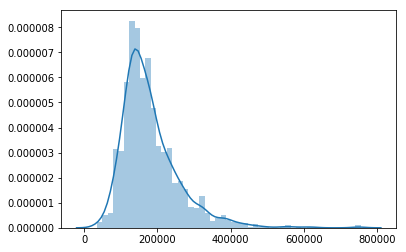

In [94]:
sns.distplot(ytrain)

In [95]:
pd.Series(ytrain).skew()

1.8812964895244009

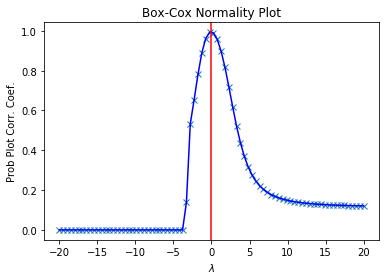

In [96]:

fig=plt.figure()
ax=fig.add_subplot(111)
p=stats.boxcox_normplot(ytrain,-20,20,plot=ax)
plt.plot(p[0], p[1], color='b')
_,maxlog=stats.boxcox(ytrain)
ax.axvline(maxlog,color='r')
plt.show()

In [97]:
p[0][np.argmax(p[1])]

-0.2531645569620231

In [98]:
ytrain_temp=ytrain

In [99]:
from scipy.special import boxcox1p
boxcox1p(pd.Series(ytrain_temp),-.02531645569620231).skew()

0.0791651369684831

In [100]:
np.log1p(pd.Series(ytrain_temp)).skew()

0.12157976050304879

In [101]:
# We will use log transformation
#ytrain=boxcox1p(ytrain_temp,-.02531645569620231)
ytrain=np.log1p(ytrain)

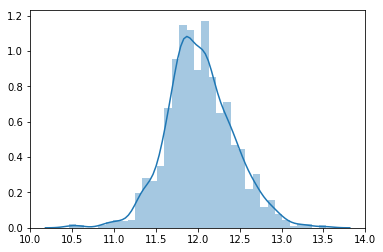

In [102]:
sns.distplot(ytrain)

In [103]:
ytrain

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

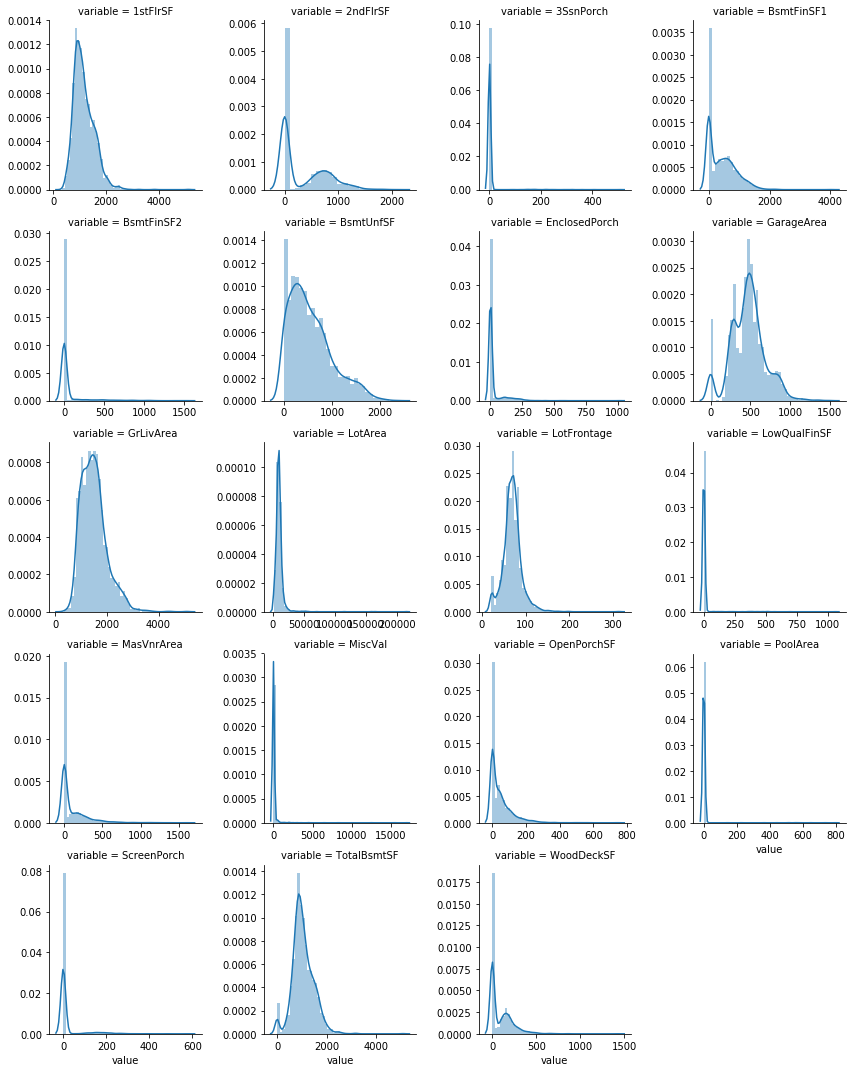

In [104]:
# Inspecting the plot of other numerical features
n_numr=['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd']
num_p=[var for var in numr if var not in n_numr]
m=pd.melt(data_merged,value_vars=sorted(num_p))
g=sns.FacetGrid(m,col='variable',col_wrap=4,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')

In [105]:
type(num_p)

list

In [106]:
skew_list=[]
for var in num_p :
    var_skew=data_merged[var].skew()
    skew_list.append(var_skew)
skew_df=pd.DataFrame({'var':num_p,'skew':skew_list})    

In [107]:
skew_df

,var,skew
0,LotFrontage,1.103606
1,LotArea,13.116240
2,MasVnrArea,2.623068
3,BsmtFinSF1,0.981149
4,BsmtFinSF2,4.146636
5,BsmtUnfSF,0.920161
6,TotalBsmtSF,0.672097
7,1stFlrSF,1.257933
8,2ndFlrSF,0.861999
9,LowQualFinSF,12.090757


In [108]:
lmbda=[]
ppcc=[]
var_name=[]
for var in num_p :
    p=stats.boxcox_normplot(data_merged[var][data_merged[var]>0],0.5,20)
    lmbda.append(p[0][np.argmax(p[1])])
    ppcc.append(p[1][np.argmax(p[1])])
    var_name.append(var)
skew_df2=pd.DataFrame({'var':var_name,'lmbda':lmbda,'ppcc_max':ppcc})    

In [109]:
skew_df2

,var,lmbda,ppcc_max
0,LotFrontage,0.500000,0.975144
1,LotArea,0.500000,0.901603
2,MasVnrArea,0.500000,0.987753
3,BsmtFinSF1,0.500000,0.995909
4,BsmtFinSF2,0.500000,0.993942
5,BsmtUnfSF,0.500000,0.994812
6,TotalBsmtSF,0.500000,0.994087
7,1stFlrSF,0.500000,0.990283
8,2ndFlrSF,0.500000,0.996563
9,LowQualFinSF,0.500000,0.972752


#### Checking the Box Cox Transformations vs Log transforms

In [110]:
lf=data_merged['LotFrontage']
lf_t=boxcox1p(lf,0.759494)
lf_t.skew()

0.45717466180294813

In [111]:
lf=data_merged['LotArea']
lf_t=boxcox1p(lf,0.253165)
lf_t.skew()

0.8030250243943823

In [112]:
lf=data_merged['MasVnrArea']
lf_t=boxcox1p(lf,0.253165)
lf_t.skew()

0.7402395442061633

In [113]:
lf=data_merged['LotFrontage']
lf_t=np.log1p(lf)
lf_t.skew()

-1.0690100005988816

In [114]:
lf=data_merged['LotArea']
lf_t=np.log1p(lf)
lf_t.skew()

-0.5329197933399701

In [115]:
lf=data_merged['MasVnrArea']
lf_t=np.log1p(lf)
lf_t.skew()

0.5387313693377834

In [116]:
# We will use a mix of BoxCox and Log Transformation
skew_df.set_index(keys=['var'],inplace=True)
skew_df2.set_index(keys=['var'],inplace=True)

In [117]:
skew_df

,skew
var,
LotFrontage,1.103606
LotArea,13.116240
MasVnrArea,2.623068
BsmtFinSF1,0.981149
BsmtFinSF2,4.146636
BsmtUnfSF,0.920161
TotalBsmtSF,0.672097
1stFlrSF,1.257933
2ndFlrSF,0.861999


In [118]:
skew_df2

,lmbda,ppcc_max
var,,
LotFrontage,0.500000,0.975144
LotArea,0.500000,0.901603
MasVnrArea,0.500000,0.987753
BsmtFinSF1,0.500000,0.995909
BsmtFinSF2,0.500000,0.993942
BsmtUnfSF,0.500000,0.994812
TotalBsmtSF,0.500000,0.994087
1stFlrSF,0.500000,0.990283
2ndFlrSF,0.500000,0.996563


In [119]:
high_skew=skew_df[abs(skew_df['skew']) > 0.7].index.values

In [120]:
high_skew

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [121]:
#data_merged_new=data_merged.copy()
#for var in high_skew :
#    lmbda=skew_df2.loc[var,'lmbda']
#    var_boxcox=boxcox1p(data_merged_new[var],lmbda)
#    var_log=np.log1p(data_merged_new[var])
#    if abs(var_boxcox.skew()) < abs(var_log.skew()) :
#        data_merged_new[var]=var_boxcox
#        if abs(data_merged_new[var].skew()) > abs(data_merged[var].skew()) :
#           if  abs(data_merged[var].skew()) < abs(var_log.skew()) :
#               data_merged_new[var]=data_merged[var]
#           else :
#                data_merged_new[var]=var_log
#    else :
#        data_merged_new[var]=var_log

In [122]:
## We will do a simple log transformation of the highly skewed variables

In [123]:
data_merged_new=data_merged.copy()

In [124]:
for var in high_skew :
    data_merged_new[var]=np.log1p(data_merged_new[var])

In [125]:
for var in high_skew :
    print(var)
    print("Original Skew is {:,.4f}".format(skew_df.loc[var,'skew']))
    print("After transformation the skew is {:,.4f}".format(data_merged_new[var].skew()))
    print("")

LotFrontage
Original Skew is 1.1036
After transformation the skew is -1.0690

LotArea
Original Skew is 13.1162
After transformation the skew is -0.5329

MasVnrArea
Original Skew is 2.6231
After transformation the skew is 0.5387

BsmtFinSF1
Original Skew is 0.9811
After transformation the skew is -0.6168

BsmtFinSF2
Original Skew is 4.1466
After transformation the skew is 2.4625

BsmtUnfSF
Original Skew is 0.9202
After transformation the skew is -2.1553

1stFlrSF
Original Skew is 1.2579
After transformation the skew is 0.0304

2ndFlrSF
Original Skew is 0.8620
After transformation the skew is 0.3068

LowQualFinSF
Original Skew is 12.0908
After transformation the skew is 8.5590

GrLivArea
Original Skew is 1.0693
After transformation the skew is -0.0221

WoodDeckSF
Original Skew is 1.8457
After transformation the skew is 0.1596

OpenPorchSF
Original Skew is 2.5307
After transformation the skew is -0.0416

EnclosedPorch
Original Skew is 4.0044
After transformation the skew is 1.9610

3SsnPo

In [126]:
# Exploring categorical variables
#cat=[var for var in cat if var not in ['Alley','MiscFeature']]
cf=pd.melt(data_merged_new,value_vars=sorted(cat))


/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


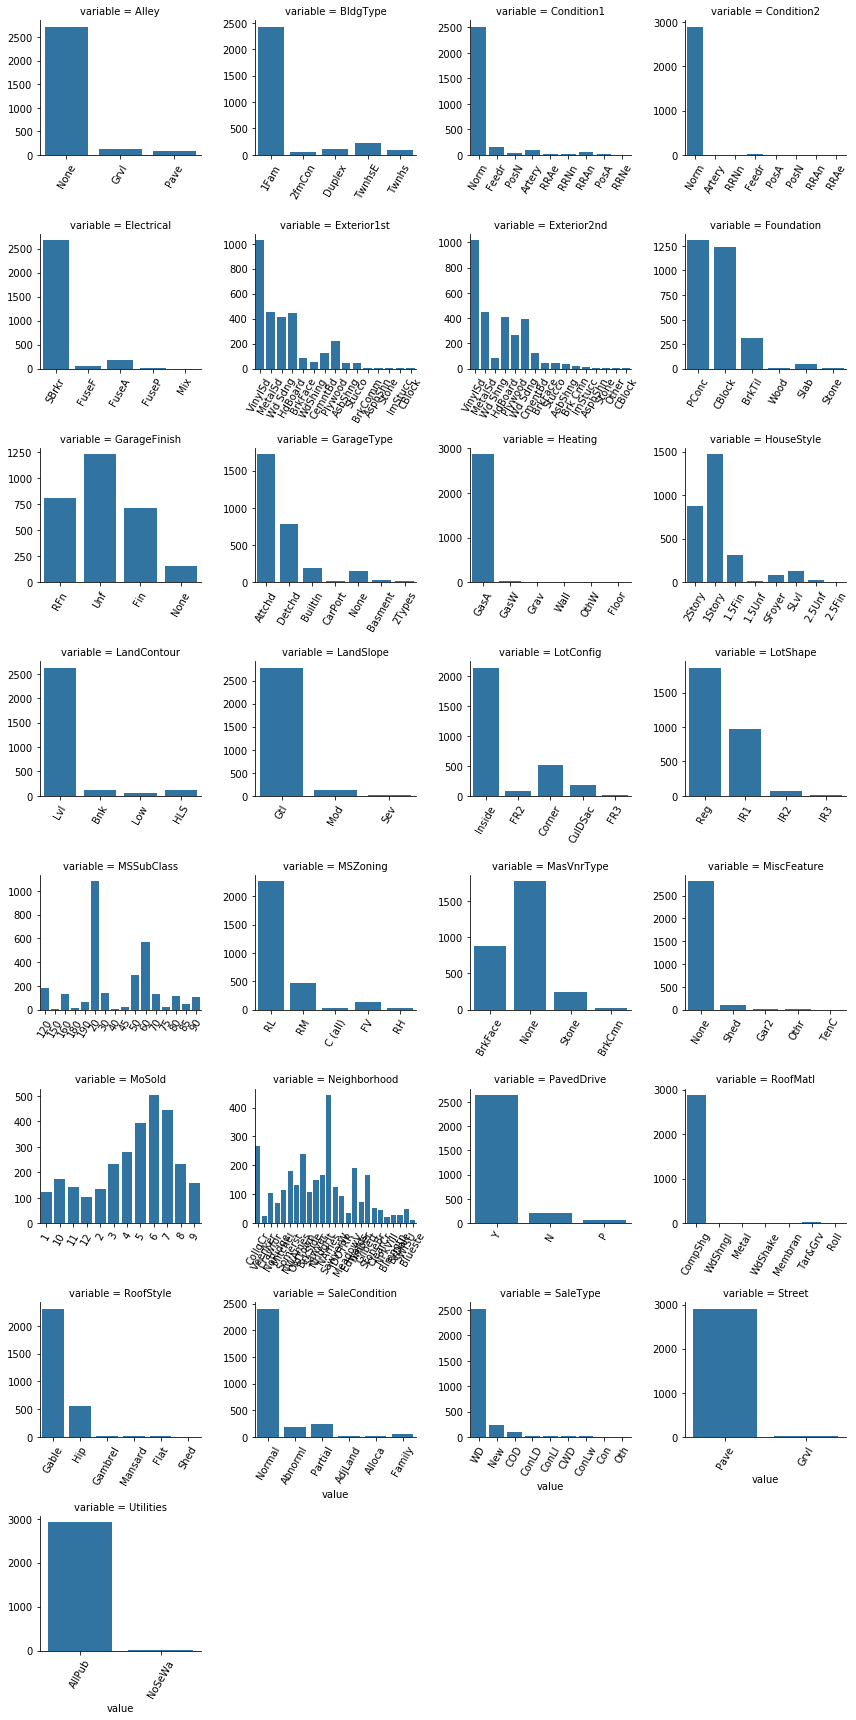

In [127]:
g=sns.FacetGrid(cf,col='variable',sharex=False,sharey=False,col_wrap=4)
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
plt.tight_layout()
plt.show()

In [128]:
# As we can see that there are a lot rare values ..

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


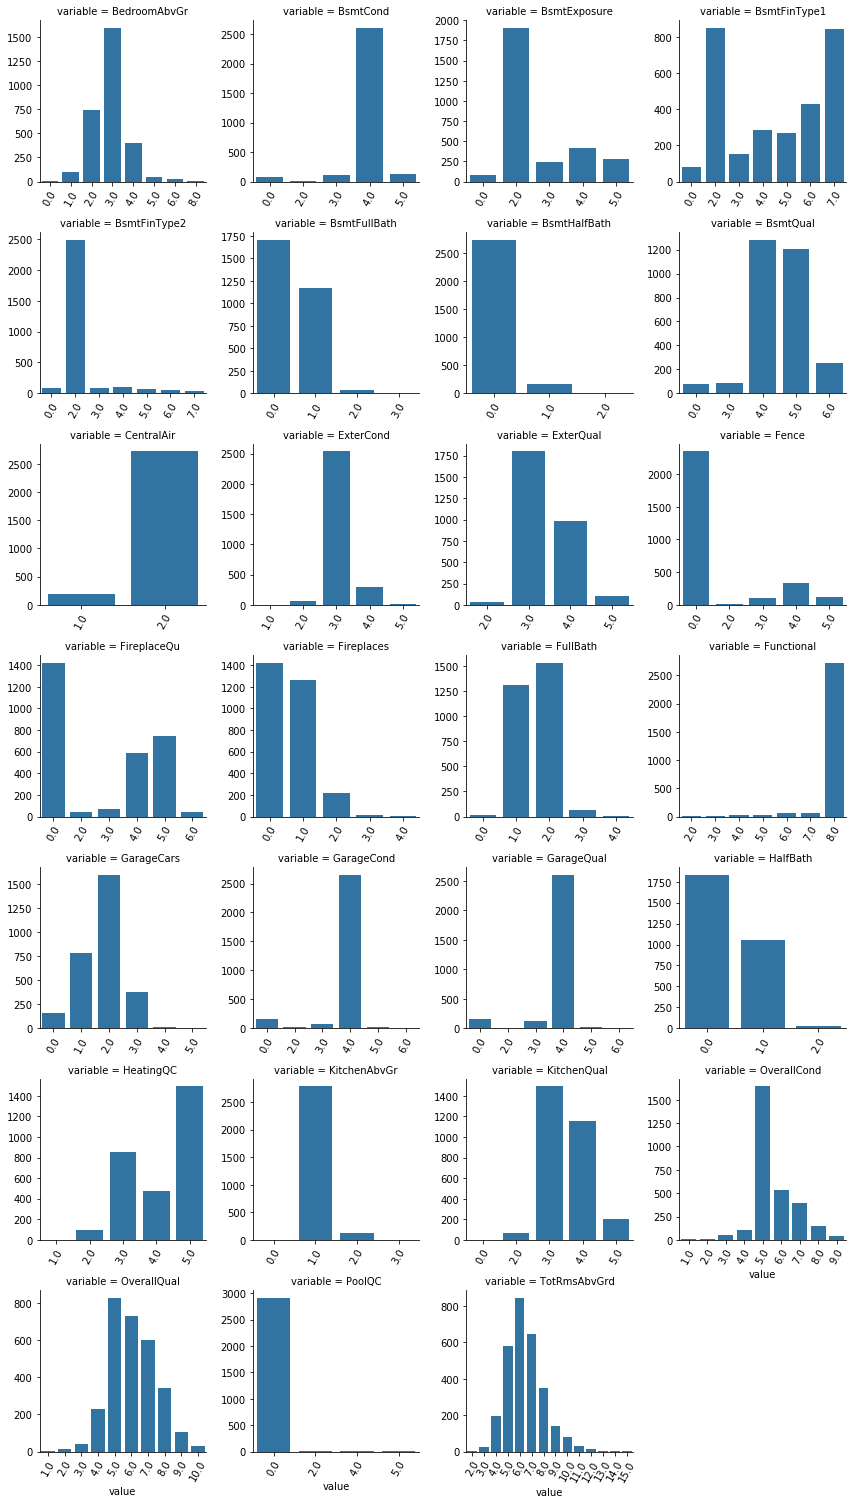

In [129]:
dis_f=pd.melt(data_merged_new,value_vars=sorted(discrete))
g=sns.FacetGrid(dis_f,col='variable',sharex=False,sharey=False,col_wrap=4)
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
plt.tight_layout()
plt.show()

In [130]:
# Combining Rare values in categorical variables
for var in cat :
    print(var)
    print(data_merged_new[var].value_counts(normalize=True))
    print("")

MSZoning
RL         0.776140
RM         0.158725
FV         0.047652
RH         0.008913
C (all)    0.008570
Name: MSZoning, dtype: float64

Street
Pave    0.995886
Grvl    0.004114
Name: Street, dtype: float64

Alley
None    0.932122
Grvl    0.041138
Pave    0.026740
Name: Alley, dtype: float64

LotShape
Reg    0.637299
IR1    0.331505
IR2    0.026054
IR3    0.005142
Name: LotShape, dtype: float64

LandContour
Lvl    0.898869
HLS    0.041138
Bnk    0.039424
Low    0.020569
Name: LandContour, dtype: float64

Utilities
AllPub    0.999657
NoSeWa    0.000343
Name: Utilities, dtype: float64

LotConfig
Inside     0.730888
Corner     0.174837
CulDSac    0.060336
FR2        0.029140
FR3        0.004799
Name: LotConfig, dtype: float64

LandSlope
Gtl    0.951663
Mod    0.042852
Sev    0.005485
Name: LandSlope, dtype: float64

Neighborhood
NAmes      0.151868
CollgCr    0.091532
OldTown    0.081933
Edwards    0.065821
Somerst    0.062393
NridgHt    0.056908
Gilbert    0.056565
Sawyer     0.05176

In [131]:
for var in cat :
    categories=data_merged_new[var].value_counts(normalize=True)
    rare=categories[categories<0.04].index.values
    data_merged_new[var]=data_merged_new[var].apply(lambda x : np.where(x in rare,'Rare',x))


In [132]:
for var in cat :
    print(var)
    print(data_merged_new[var].value_counts(normalize=True))
    print("")

MSZoning
RL      0.776140
RM      0.158725
FV      0.047652
Rare    0.017484
Name: MSZoning, dtype: float64

Street
Pave    0.995886
Rare    0.004114
Name: Street, dtype: float64

Alley
None    0.932122
Grvl    0.041138
Rare    0.026740
Name: Alley, dtype: float64

LotShape
Reg     0.637299
IR1     0.331505
Rare    0.031196
Name: LotShape, dtype: float64

LandContour
Lvl     0.898869
Rare    0.059993
HLS     0.041138
Name: LandContour, dtype: float64

Utilities
AllPub    0.999657
Rare      0.000343
Name: Utilities, dtype: float64

LotConfig
Inside     0.730888
Corner     0.174837
CulDSac    0.060336
Rare       0.033939
Name: LotConfig, dtype: float64

LandSlope
Gtl     0.951663
Mod     0.042852
Rare    0.005485
Name: LandSlope, dtype: float64

Neighborhood
Rare       0.293452
NAmes      0.151868
CollgCr    0.091532
OldTown    0.081933
Edwards    0.065821
Somerst    0.062393
NridgHt    0.056908
Gilbert    0.056565
Sawyer     0.051766
NWAmes     0.044909
SawyerW    0.042852
Name: Neighbo

In [133]:
# Street,Utilities,Condition2,RoofMatl,Heating,Alley,MiscFeature have a dominant category..These varables can be removed after verifying with the ANOVA test later

### Bivariate Analysis

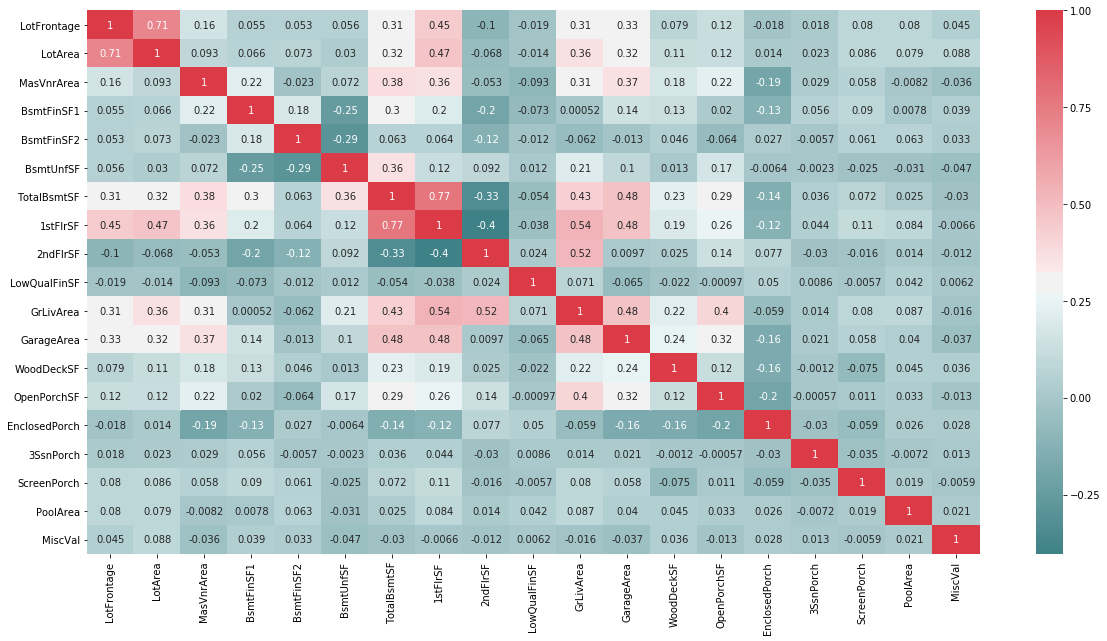

In [134]:
# Exploring correlations
corr_mat=data_merged_new[num_p].corr()
fig=plt.figure(figsize=(20,10))
fig.add_subplot(111)
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(corr_mat,xticklabels=corr_mat.columns.values,yticklabels=corr_mat.columns.values,cmap=cmap,annot=True)
plt.show()

In [135]:
# In the above plot, we dont see too many correlated variables.....

In [136]:
# Now, we will explore correlation among the target variable and the numeric and discrete variables
data_train=data_merged_new.iloc[:ntrain,]
#corr_target=data_merged_new[num_p].corrwith(ytrain).plot.bar(figsize=(20,10),grid=True,title="Correlation with SalePrice")
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,None,0.0,2,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,Rare,...,0.0,0.0,0.0,0.0,None,0.0,5,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,None,0.0,9,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,0.0,None,0.0,2,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,Rare,...,0.0,0.0,0.0,0.0,None,0.0,Rare,2008,WD,Normal


In [137]:
data_train.shape

(1458, 79)

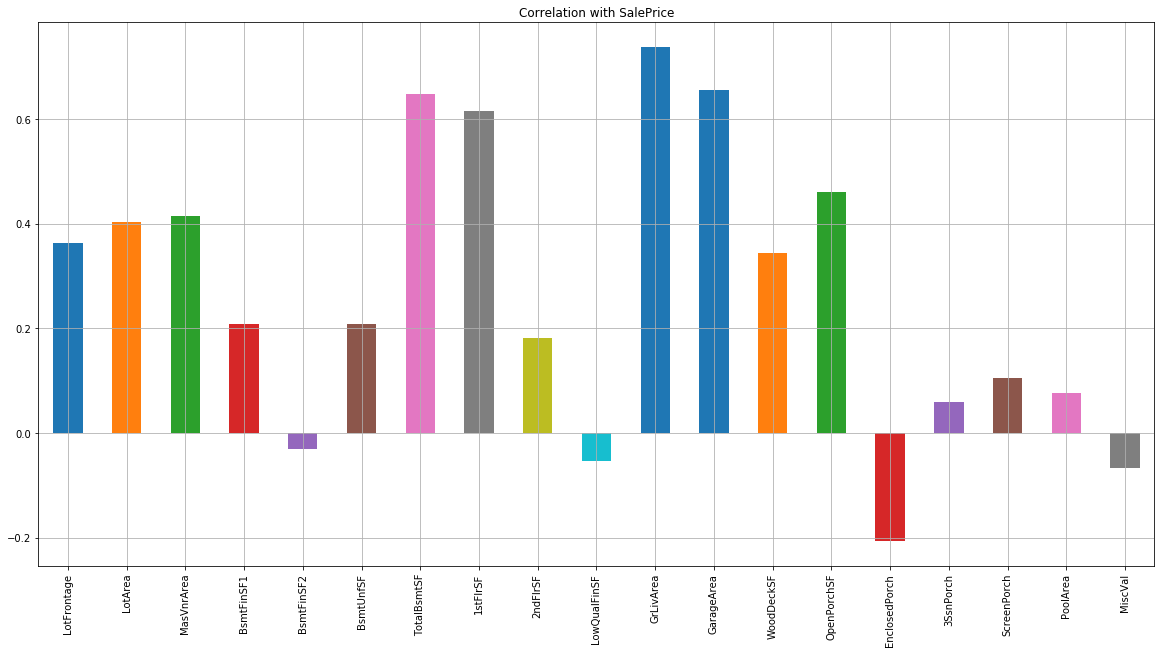

In [138]:
data_train[num_p].corrwith(pd.Series(ytrain)).plot.bar(figsize=(20,10),grid=True,title="Correlation with SalePrice")

In [139]:
# The numerical variables GrLivArea,1stFlrSF,TotalBsmtSF,GarageArea have the highest correlations

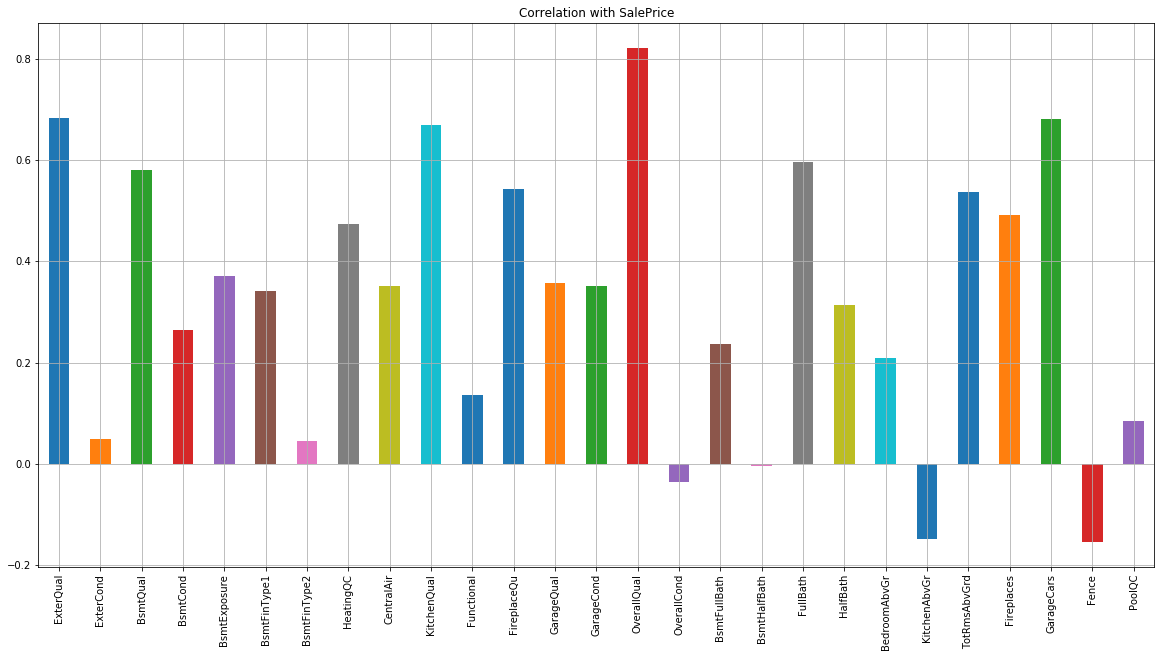

In [140]:
data_train[discrete].corrwith(pd.Series(ytrain)).plot.bar(figsize=(20,10),grid=True,title="Correlation with SalePrice")

In [141]:
age_of_house=data_merged_new['YrSold']-data_merged_new['YearBuilt']

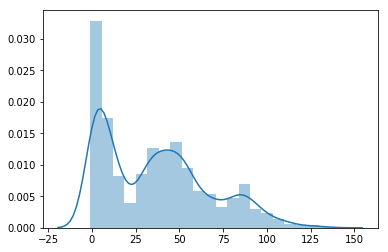

In [142]:
sns.distplot(age_of_house)

In [143]:
age_of_house.skew()

0.5983225145278107

In [144]:
age_of_house.head()

0     5
1    31
2     7
3    91
4     8
dtype: int64

In [145]:
age_of_house.describe()

count    2917.000000
mean       36.504971
std        30.331531
min        -1.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
dtype: float64

In [146]:
data_merged_new.loc[data_merged_new.YearBuilt > data_merged_new.YrSold,['YearBuilt','YrSold']]

,YearBuilt,YrSold
2547,2008,2007


In [147]:
# May be the above house was sold before it was built
data_merged_new.loc[data_merged_new.YearBuilt > data_merged_new.YrSold,['YearBuilt','YrSold','SaleCondition']]

,YearBuilt,YrSold,SaleCondition
2547,2008,2007,Partial


In [148]:
data_merged_new['age_of_house']=age_of_house

In [149]:
data_train['age_of_house']=age_of_house[:ntrain]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
data_train[['age_of_house']].corrwith(pd.Series(ytrain))

age_of_house   -0.587767
dtype: float64

In [151]:
age_of_garage=data_merged_new['YrSold']-data_merged_new['GarageYrBlt']

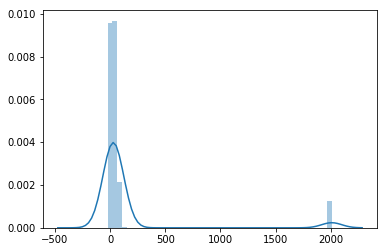

In [152]:
sns.distplot(age_of_garage)

In [153]:
age_of_garage.describe()

count    2917.000000
mean      137.522797
std       449.841848
min      -200.000000
25%         7.000000
50%        30.000000
75%        51.000000
max      2010.000000
dtype: float64

In [154]:
data_merged_new['GarageYrBlt'].min()

0.0

In [155]:
data_merged_new['GarageYrBlt'].max()

2207.0

In [156]:
data_merged_new['GarageYrBlt'].value_counts()

0.0       159
2005.0    142
2006.0    115
2007.0    114
2004.0     99
2003.0     92
1977.0     66
2008.0     60
1998.0     58
2000.0     55
1999.0     54
2002.0     53
1950.0     51
1976.0     50
1993.0     49
1968.0     48
1997.0     44
1958.0     42
1956.0     41
1978.0     41
2001.0     41
1996.0     40
1994.0     39
1966.0     39
1954.0     37
1960.0     37
1967.0     36
1959.0     36
1964.0     35
1974.0     35
         ... 
1922.0      8
1935.0      8
1924.0      8
1915.0      7
1928.0      7
1936.0      7
1937.0      6
1900.0      6
1916.0      6
1923.0      6
1942.0      6
1947.0      5
2010.0      5
1927.0      5
1921.0      5
1931.0      4
1932.0      4
1934.0      4
1918.0      3
1917.0      2
1914.0      2
1929.0      2
1943.0      1
1908.0      1
1895.0      1
1933.0      1
1919.0      1
1896.0      1
2207.0      1
1906.0      1
Name: GarageYrBlt, Length: 104, dtype: int64

In [157]:
data_merged_new.loc[data_merged_new.GarageYrBlt==2207,['YearBuilt','age_of_house','GarageYrBlt','YrSold','GarageFinish']]

,YearBuilt,age_of_house,GarageYrBlt,YrSold,GarageFinish
2590,2006,1,2207.0,2007,RFn


In [158]:
# lets change the Garage Year Built to 2007...
data_merged_new.loc[data_merged_new.GarageYrBlt==2207,['GarageYrBlt']]=2007.0

In [159]:
data_merged_new['age_of_garage']=age_of_garage
data_train['age_of_garage']=age_of_garage[:ntrain]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
data_train[['age_of_garage']].corrwith(pd.Series(ytrain))

age_of_garage   -0.349109
dtype: float64

In [161]:
#Correlation is not that high, though it shows a negative value

In [162]:
age_of_remodelling=data_merged_new['YrSold']-data_merged_new['YearRemodAdd']

In [163]:
age_of_remodelling.describe()

count    2917.000000
mean       23.544738
std        20.889738
min        -2.000000
25%         4.000000
50%        15.000000
75%        43.000000
max        60.000000
dtype: float64

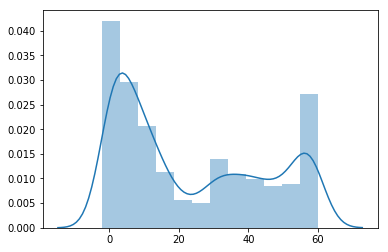

In [164]:
sns.distplot(age_of_remodelling)

In [165]:
age_of_remodelling.skew()

0.44959559350079453

In [166]:
data_merged_new.loc[data_merged_new.YearRemodAdd > data_merged_new.YrSold,['YearRemodAdd','YrSold','SaleCondition']]

,YearRemodAdd,YrSold,SaleCondition
2293,2008,2007,Partial
2547,2009,2007,Partial


In [167]:
data_merged_new['age_of_remodelling']=age_of_remodelling
data_train['age_of_remodelling']=age_of_remodelling[:ntrain]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
data_train[['age_of_remodelling']].corrwith(pd.Series(ytrain))

age_of_remodelling   -0.568529
dtype: float64

In [169]:
data_merged_new['YrSold']=data_merged_new['YrSold'].astype(str)
data_train['YrSold']=data_train['YrSold'].astype(str)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [170]:
cat.append('YrSold')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


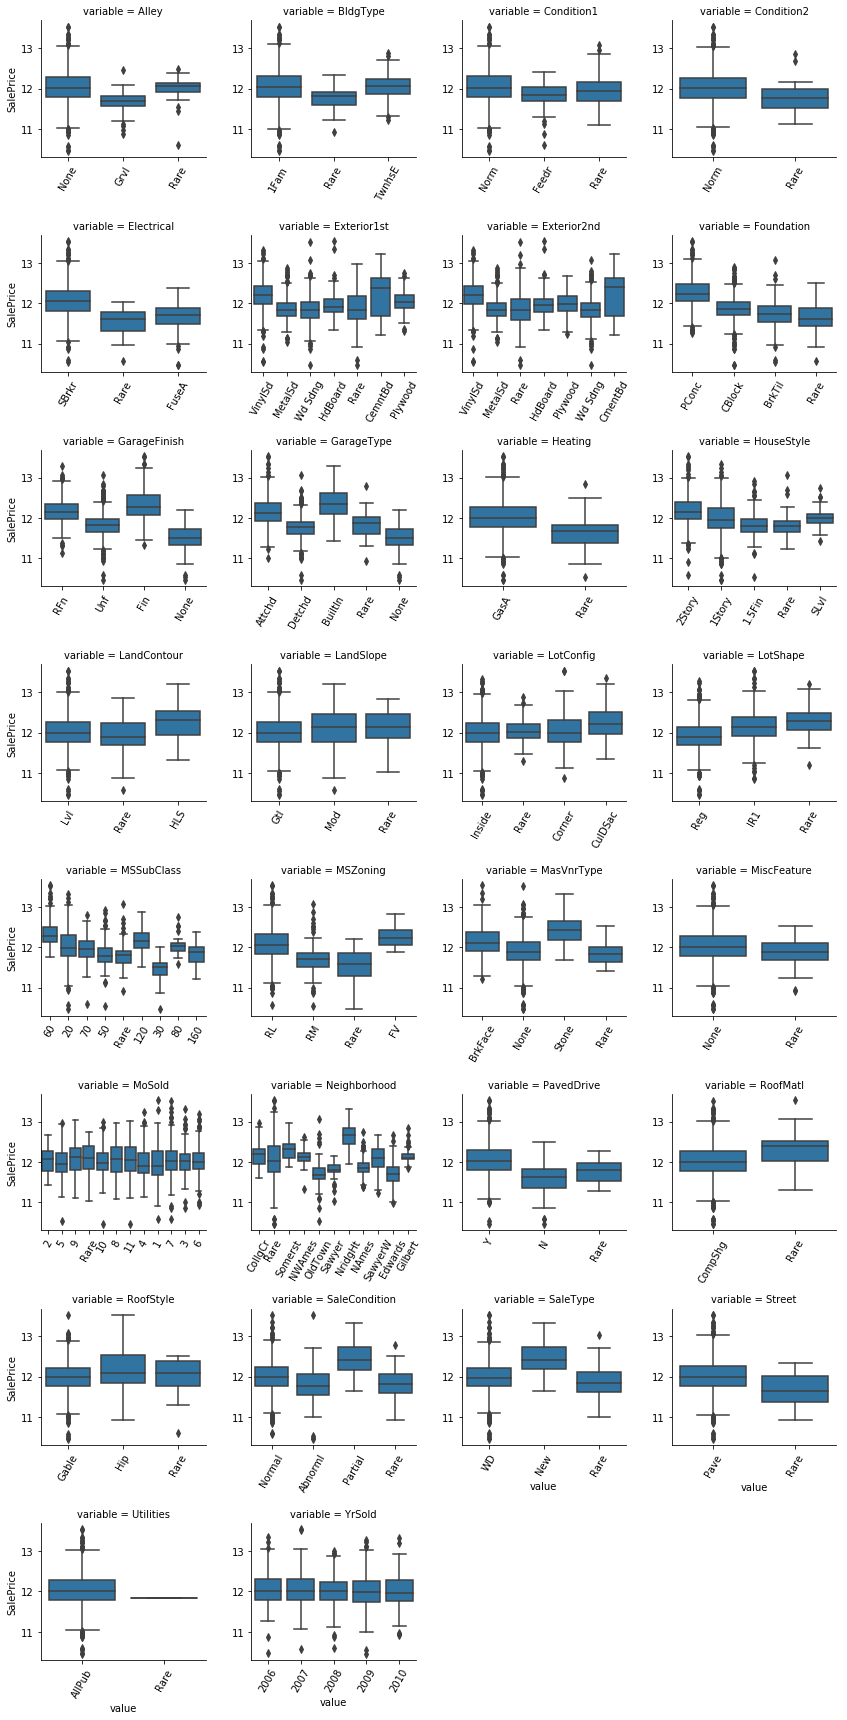

In [171]:
# Exploring categorical variables
data_train['SalePrice']=ytrain
cat_melt=pd.melt(data_train,id_vars=['SalePrice'],value_vars=sorted(cat))
g=sns.FacetGrid(cat_melt,col='variable',sharex=False,sharey=False,col_wrap=4)
g=g.map(sns.boxplot,'value','SalePrice')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
plt.tight_layout()
plt.show()


In [172]:
# Selecting Important features using ANOVA
from scipy.stats import f_oneway
anova={'var':[],'p':[]}
for ctg in cat :
    grp_prices=[]
    for val in data_train[ctg].unique() :
        grp_prices.append(data_train[data_train[ctg]==val]['SalePrice'].values)
    _,p=f_oneway(*grp_prices)   
    anova['var'].append(ctg)
    anova['p'].append(p)
print(anova)    

{'var': ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition', 'MoSold', 'MSSubClass', 'YrSold'], 'p': [1.1106145368083513e-56, 0.028502659850414273, 1.4010911565377863e-09, 9.440714316448946e-30, 6.144529946325022e-06, 0.6299096196935999, 2.210874705784775e-07, 0.3388360007563695, 3.469546571746889e-104, 1.1231413177375768e-06, 0.06298099835968127, 1.4134594475577178e-13, 5.648525255579011e-30, 1.7896113416099738e-13, 0.00042178743799704664, 1.0330269520577499e-48, 5.042598931245296e-48, 7.044017411477694e-66, 3.50778125175878e-111, 2.6608311845290014e-07, 1.6638712701305334e-32, 1.1981562466732133e-125, 3.152864688912277e-151, 1.2063708625952013e-31, 0.0030884280179874725, 4.12030

In [173]:
anova=pd.DataFrame(anova)

In [174]:
anova.sort_values(by=['p'],inplace=True)

In [175]:
anova

,var,p
22,GarageFinish,3.152865e-151
21,GarageType,1.198156e-125
28,MSSubClass,5.605868e-115
18,Foundation,3.507781e-111
8,Neighborhood,3.469547e-104
17,MasVnrType,7.044017e-66
0,MSZoning,1.110615e-56
15,Exterior1st,1.033027e-48
16,Exterior2nd,5.042599e-48
26,SaleCondition,4.660335e-43


In [176]:
anova.set_index(['var'],inplace=True)

In [177]:
not_useful_cat=anova[anova.p>0.05].index.values

In [178]:
not_useful_cat

array(['Condition2', 'LandSlope', 'MoSold', 'YrSold', 'Utilities'],
      dtype=object)

In [179]:
cat=[var for var in cat if var not in not_useful_cat]

In [180]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [181]:
data_merged_new['HasGarage']=np.where(data_merged_new['GarageYrBlt']>0,'Yes','No')

In [182]:
#Creating this varaible in data_train as well
data_train['HasGarage']=np.where(data_train['GarageYrBlt']>0,'Yes','No')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [183]:
#dropping the columns
data_merged_new.drop(columns=['GarageYrBlt','YearRemodAdd','YearBuilt'],inplace=True)

In [184]:
#Updating data train as well
data_train.drop(columns=['GarageYrBlt','YearRemodAdd','YearBuilt'],inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [185]:
#Dropping some categorical variables
data_merged_new.drop(columns=not_useful_cat,inplace=True)

In [186]:
data_train.drop(columns=not_useful_cat,inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [187]:
# Deleting PoolQC and Fence
data_merged_new.drop(columns=['PoolQC','Fence'],inplace=True)
data_train.drop(columns=['PoolQC','Fence'],inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [188]:
discrete=[var for var in discrete if var not in ['PoolQC','Fence']]

#### Label Encoding

In [189]:
from sklearn.preprocessing import LabelEncoder

In [190]:
discrete

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [191]:
cat_to_disc=['HouseStyle','MSSubClass','MSZoning','PavedDrive','LotShape','LandContour','Electrical','GarageFinish','BldgType']

In [192]:
le=LabelEncoder()

In [193]:
for var in cat_to_disc :
    data_merged_new[var]=le.fit_transform(data_merged_new[var])

In [194]:
data_merged_new[cat_to_disc]

,HouseStyle,MSSubClass,MSZoning,PavedDrive,LotShape,LandContour,Electrical,GarageFinish,BldgType
0,2,5,1,2,2,1,2,2,0
1,1,2,1,2,2,1,2,2,0
2,2,5,1,2,0,1,2,2,0
3,2,6,1,2,0,1,2,3,0
4,2,5,1,2,0,1,2,2,0
5,0,4,1,2,0,1,2,3,0
6,1,2,1,2,2,1,2,2,0
7,2,5,1,2,0,1,2,2,0
8,0,4,2,2,2,1,1,3,0
9,3,8,1,2,2,1,2,2,1


In [195]:
#Updating the list of categorical columns
cat=[var for var in cat if var not in cat_to_disc]

In [196]:
cat

['Street',
 'Alley',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [197]:
#Updating the list of discrete variables
discrete.append('HouseStyle')
discrete.append('MSSubClass')
discrete.append('MSZoning')
discrete.append('PavedDrive')
discrete.append('LotShape')
discrete.append('LandContour')
discrete.append('Electrical')
discrete.append('GarageFinish')
discrete.append('BldgType')

#### Feature Engineering

In [198]:
total_SF = data_merged_new['TotalBsmtSF'] + data_merged_new['1stFlrSF'] + data_merged_new['2ndFlrSF']
data_merged_new['Total_SF']=total_SF
data_merged_new[['Total_SF']].corrwith(pd.Series(ytrain))

Total_SF    0.650697
dtype: float64

In [199]:
total_floor_SF = data_merged_new['1stFlrSF'] + data_merged_new['2ndFlrSF']
data_merged_new['Total_floor_SF']=total_floor_SF
data_merged_new[['Total_floor_SF']].corrwith(pd.Series(ytrain))

Total_floor_SF    0.24707
dtype: float64

In [200]:
total_porch_area = data_merged_new['OpenPorchSF'] + data_merged_new['EnclosedPorch'] + data_merged_new['3SsnPorch']+data_merged_new['ScreenPorch']
data_merged_new['Total_Porch_Area']=total_porch_area
data_merged_new[['Total_Porch_Area']].corrwith(pd.Series(ytrain))

Total_Porch_Area    0.286472
dtype: float64

In [201]:
total_bathrooms=data_merged_new['FullBath'] + .5 * data_merged_new['HalfBath'] +  data_merged_new['BsmtFullBath'] + .5 * data_merged_new['BsmtHalfBath']
data_merged_new['Total_Bathrooms']=total_bathrooms
data_merged_new[['Total_Bathrooms']].corrwith(pd.Series(ytrain))

Total_Bathrooms    0.676678
dtype: float64

In [202]:
#All of the above correlations are pretty low, still it may have to do with the data.....we will keep the derived variables for Total_SF and Total_Bathrooms
data_merged_new.drop(columns=['Total_floor_SF'],inplace=True)


In [203]:
data_merged_new.drop(columns=['Total_Porch_Area'],inplace=True)

In [204]:
# Dropping age_of_garage and updating the list of numeric variables
data_merged_new.drop(columns=['age_of_garage'],inplace=True)

In [205]:
num_p.append('age_of_remodelling')
num_p.append('age_of_house')
num_p.append('Total_SF')
num_p.append('Total_Bathrooms')

In [206]:
#Lets inspect the Pool Area
data_merged_new['PoolArea'].describe()

count    2917.000000
mean        0.025262
std         0.394288
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.685861
Name: PoolArea, dtype: float64

In [207]:
data_merged_new['Has_Pool']=np.where(data_merged_new['PoolArea']>0,'Yes','No')

In [208]:
data_merged_new['Has_Bsmt']=np.where(data_merged_new['TotalBsmtSF']>0,'Yes','No')

In [209]:
#Updating the list of categorical variables
cat.append('Has_Pool')
cat.append('Has_Bsmt')
cat.append('HasGarage')

In [210]:
# Checking the categorical variables
data_merged_new.select_dtypes(exclude='number').columns.values

array(['Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature',
       'SaleType', 'SaleCondition', 'HasGarage', 'Has_Pool', 'Has_Bsmt'],
      dtype=object)

#### Dummifying categorical features

In [211]:
data_merged_new=pd.get_dummies(data_merged_new)

In [212]:
data_merged_new.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SaleCondition_Rare', 'HasGarage_No',
       'HasGarage_Yes', 'Has_Pool_No', 'Has_Pool_Yes', 'Has_Bsmt_No',
       'Has_Bsmt_Yes'],
      dtype='object', length=129)

In [213]:
data_merged_new.select_dtypes(include='number').columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'age_of_house', 'age_of_remodelling',
       'Total_SF', 'Total_Bathrooms', 'Street_Pave', 'Street_Rare',
       'Alley_Grvl', 'Alley_None', 'Alley_Rare', 'LotConfig_C

In [214]:
data_merged_new.shape

(2917, 129)

In [215]:
# Deleting some variables after dummification
data_merged_new.drop(columns=['Street_Rare','Alley_Rare','LotConfig_Rare','Condition1_Rare','Neighborhood_Rare','RoofStyle_Rare','RoofMatl_Rare','Exterior1st_Rare','Exterior2nd_Rare','MasVnrType_Rare','Foundation_Rare','Heating_Rare','GarageType_Rare','MiscFeature_Rare','SaleType_Rare','SaleCondition_Rare','HasGarage_No','Has_Pool_No','Has_Bsmt_No'],inplace=True)

In [216]:
data_merged_new.shape

(2917, 110)

#### Feature Scaling

In [217]:
# Splitting back the data set before scaling
dt_train=data_merged_new.iloc[:ntrain,:]
dt_test=data_merged_new.iloc[ntrain:,:]

In [218]:
dt_train.shape

(1458, 110)

In [219]:
dt_test.shape

(1459, 110)

In [220]:
# Applying Robust Scaler
from sklearn.preprocessing import RobustScaler
rbstScaler=RobustScaler()
dt_train.loc[:,num_p]=rbstScaler.fit_transform(dt_train[num_p])
dt_test.loc[:,num_p]=rbstScaler.transform(dt_test[num_p])

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [221]:
# A quick glance after Robust scaling
dt_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageType_None,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,HasGarage_Yes,Has_Pool_Yes,Has_Bsmt_Yes
0,5,1,-0.257516,-0.266140,2,1,0,2,7,5,...,0,1,0,1,0,1,0,1,0,1
1,2,1,0.464671,0.030467,2,1,0,1,6,8,...,0,1,0,1,0,1,0,1,0,1
2,5,1,-0.100761,0.399160,0,1,0,2,7,5,...,0,1,0,1,0,1,0,1,0,1
3,6,1,-0.535329,0.018328,0,1,0,2,7,5,...,0,1,0,1,1,0,0,1,0,1
4,5,1,0.634651,0.950309,0,1,0,2,8,5,...,0,1,0,1,0,1,0,1,0,1


In [222]:
# This completes the Data Analysis phase..next we start modeling

### Modeling

In [223]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [224]:
param_grid = {'alpha': [0.0001,0.001,0.01, 0.05,0.1, 1., 5.]}
lsso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lsso.fit(dt_train, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [225]:
lsso.best_params_

{'alpha': 0.001}

In [226]:
lsso_pred=lsso.best_estimator_.predict(dt_test)

In [227]:
sub_lasso=pd.DataFrame()

In [228]:
sub_lasso['Id']=test_id
sub_lasso['SalePrice']=np.exp(lsso_pred)

In [229]:
param_grid = {'alpha': [0.0001,0.001,0.01, 0.05,0.1, 1.]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
ridge.fit(dt_train, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [230]:
ridge.best_params_

{'alpha': 1.0}

In [231]:
ridge_pred=ridge.best_estimator_.predict(dt_test)

In [232]:
sub_ridge=pd.DataFrame()

In [233]:
sub_ridge['Id']=test_id
sub_ridge['SalePrice']=np.exp(ridge_pred)

In [234]:
# Checking their scores on training
lsso.best_score_

-0.01357390007884377

In [235]:
ridge.best_score_

-0.013808414571455851

In [236]:
# Both are roughly equal.....lets try Random Forest
from sklearn.ensemble import RandomForestRegressor
import time

In [237]:
parameter_grid={'n_estimators':[int(x) for x in np.linspace(200,600,50)],
                'min_samples_leaf':[int(x) for x in np.linspace(2,50,5)],
                'min_samples_split':[int(x) for x in np.linspace(2,50,5)],
               }
rf=RandomForestRegressor(n_jobs=-1,random_state=10)
rf_reg=RandomizedSearchCV( estimator=rf,
                     param_distributions=parameter_grid,
                          scoring='neg_mean_squared_error',
                          n_iter=100,       
                          cv=5)
t1=time.time()
rf_reg.fit(dt_train,ytrain)
t2=time.time()

In [238]:
t2-t1

523.2681984901428

In [239]:
#Honing in...
rf_reg.best_params_

{'n_estimators': 542, 'min_samples_split': 2, 'min_samples_leaf': 2}

In [240]:
parameter_grid={'n_estimators':[500,542,600],
                'min_samples_leaf':[2,5,10],
                'min_samples_split':[2,5,10]
               }
rf=RandomForestRegressor(n_jobs=-1,random_state=10)
rf_reg=GridSearchCV( estimator=rf,
                     param_grid=parameter_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)
t1=time.time()
rf_reg.fit(dt_train,ytrain)
t2=time.time()

In [241]:
t2-t1

231.5573856830597

In [242]:
rf_reg.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 542}

In [243]:
rf=RandomForestRegressor(n_estimators=542,min_samples_leaf=2,min_samples_split=2,n_jobs=-1,random_state=10)
max_d=[int(x) for x in np.linspace(10,110,10)]
max_d.append(None)
parameter_grid={'max_depth':max_d}
rf_reg2=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [244]:
rf_reg2.fit(dt_train,ytrain)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=542, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [245]:
rf_reg2.best_params_

{'max_depth': 21}

In [249]:
#Honing in on Max_depth..
rf=RandomForestRegressor(n_estimators=542,min_samples_leaf=2,min_samples_split=2,n_jobs=-1,random_state=10)
max_d=[10,21,40]
max_d.append(None)
parameter_grid={'max_depth':max_d}
rf_reg2=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [250]:
rf_reg2.fit(dt_train,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   39.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=542, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 21, 40, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [251]:
rf_reg2.best_params_

{'max_depth': 21}

In [252]:
parameter_grid={'bootstrap':[True,False],
               'max_features':['auto','sqrt']
               }
rf=RandomForestRegressor(n_estimators=542,min_samples_leaf=2,min_samples_split=2,max_depth=21,n_jobs=-1,random_state=10)
rf_reg3=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5)

In [253]:
rf_reg3.fit(dt_train,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=21,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=542, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [254]:
rf_reg3.best_params_

{'bootstrap': False, 'max_features': 'sqrt'}

In [255]:
rf_pred=rf_reg3.best_estimator_.predict(dt_test)

In [256]:
##Lets check the best score for the Random forest on training data
rf_reg3.best_score_

-0.01797495727537695

In [257]:
##..Lasso and Ridge have better scores on training...

### Combining Models

In [258]:
test_pred=pd.DataFrame({'Ridge':ridge_pred,'Lasso':lsso_pred,'RF':rf_pred})

In [259]:
# We have collected all the predictions in a data frame...as seen a simple average of the lasso and ridge models gave me the best score

In [260]:
avg_pred=(ridge_pred+lsso_pred)/2
fin_sub=pd.DataFrame()
fin_sub['Id']=test_id
fin_sub['SalePrice']=np.exp(avg_pred)
fin_sub.to_csv('Final_Sub_Krishanu.csv',header=True,index=False)

In [262]:
##..this prompts me to try to out Elastic Net
from sklearn.linear_model import ElasticNet

In [265]:
parametersGrid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1., 10.,],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
enet_grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=10)
enet_grid.fit(dt_train, ytrain)
    

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [266]:
enet_grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.0}

In [267]:
enet_grid.best_score_

-0.013109192468806315

In [268]:
enet_pred=enet_grid.best_estimator_.predict(dt_test)

In [276]:
test_pred['ENet']=enet_pred

In [269]:
fin_sub=pd.DataFrame()
fin_sub['Id']=test_id
fin_sub['SalePrice']=np.exp(enet_pred)
fin_sub.to_csv('Final_Sub_Krishanu_ENet.csv',header=True,index=False)


In [270]:
# Submission score of 0.12155..which is not better than 0.120405

In [272]:
avg_pred=(lsso_pred+enet_pred)/2
fin_sub=pd.DataFrame()
fin_sub['Id']=test_id
fin_sub['SalePrice']=np.exp(avg_pred)
fin_sub.to_csv('Final_Sub_Krishanu.csv',header=True,index=False)

In [273]:
# Submission score of 0.12120..which is not better than 0.120405...

In [274]:
#Thus a the average of lasso and ridge gives the best predictions..

In [275]:
# We will prepare for creating complex ensembles in future..

#### Conclusion

For my efforts,was placed in top 24% in Public Leaderboard